# Data Cleaning

Here we clean up the merged file and quantify missingness in the data.

**Sections**
- [Setup](#Setup)
- [Load data](#Load-data)
- [Initial profiling](#Initial-profiling)
- [Studying similar columns](#Studying-similar-columns)
- [Missingness analysis](#Missingness-analysis)

## Setup

In [1]:
# Setup

import os
import sys
import math
import json
from typing import List, Dict, Optional, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
# load the merged datasets

df = pd.read_csv("merged_data.csv")

## Initial profiling

In [3]:
# First summary

print('Rows:', len(df), 'Columns:', df.shape[1])
mem = df.memory_usage(deep=True).sum() / (1024**2)
print(f'Memory MB: {mem:.2f}')
display(df.head(3))
display(df.tail(3))
display(df.describe(include='all').T)

Rows: 72157 Columns: 61
Memory MB: 97.93


,GEOID,TractID2010,StCoFIPS2019,StAbbr,NatWalkInd,Pop2018,HU2018,HH2018,D2A_EPHHM,D2B_E8MIXA,...,highchol_crude95ci,kidney_crudeprev,kidney_crude95ci,obesity_crudeprev,obesity_crude95ci,phlth_crudeprev,phlth_crude95ci,stroke_crudeprev,stroke_crude95ci,geolocation
0,1001020100,1001020100,1001,AL,2.333333,1923,779,765,0.189174,0.153064,...,"(34.5, 36.7)",2.8,"( 2.6, 3.0)",34.9,"(33.4, 36.5)",15.0,"(13.5, 16.6)",3.5,"( 3.1, 3.9)",POINT (-86.49001486 32.47718251)
1,1001020200,1001020200,1001,AL,8.833333,2028,852,719,0.803385,0.573766,...,"(31.8, 33.6)",3.2,"( 3.1, 3.4)",41.3,"(39.9, 42.6)",15.9,"(14.5, 17.3)",4.3,"( 3.9, 4.7)",POINT (-86.47338874 32.47425254)
2,1001020300,1001020300,1001,AL,5.166667,3476,1397,1296,0.390436,0.537381,...,"(34.0, 35.9)",2.9,"( 2.8, 3.1)",35.7,"(34.2, 37.0)",15.3,"(13.9, 16.8)",3.7,"( 3.4, 4.1)",POINT (-86.4602024 32.47543618)


,GEOID,TractID2010,StCoFIPS2019,StAbbr,NatWalkInd,Pop2018,HU2018,HH2018,D2A_EPHHM,D2B_E8MIXA,...,highchol_crude95ci,kidney_crudeprev,kidney_crude95ci,obesity_crudeprev,obesity_crude95ci,phlth_crudeprev,phlth_crude95ci,stroke_crudeprev,stroke_crude95ci,geolocation
72154,56043000302,56043000302,56043,WY,6.666667,2584,1102,993,0.668727,0.545297,...,"(32.0, 34.0)",3.6,"( 3.3, 3.8)",29.6,"(28.3, 30.9)",14.0,"(12.6, 15.3)",4.1,"( 3.7, 4.6)",POINT (-107.949451 44.0275357)
72155,56045951100,56045951100,56045,WY,5.666667,3286,1630,1420,0.566666,0.690116,...,"(31.0, 32.2)",3.0,"( 2.9, 3.1)",34.9,"(34.0, 35.9)",13.2,"(12.5, 13.9)",3.6,"( 3.4, 3.8)",POINT (-104.5735492 43.84016153)
72156,56045951300,56045951300,56045,WY,8.166667,3814,1935,1642,0.684989,0.748049,...,"(29.5, 31.4)",2.9,"( 2.7, 3.1)",32.8,"(31.3, 34.1)",12.1,"(11.0, 13.2)",3.4,"( 3.0, 3.8)",POINT (-104.254357 43.85902408)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GEOID,72157.0,NaN,NaN,NaN,27864795929.964371,15815492457.510271,1001020100.0,13015960101.0,27137015200.0,41039002401.0,56045951300.0
TractID2010,72157.0,NaN,NaN,NaN,27864804994.722244,15815500672.665636,1001020100.0,13015960101.0,27137015200.0,41039002401.0,56045951300.0
StCoFIPS2019,72157.0,NaN,NaN,NaN,27864.542886,15815.486826,1001.0,13015.0,27137.0,41039.0,56045.0
StAbbr,72157,50,CA,8004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NatWalkInd,72157.0,NaN,NaN,NaN,9.844118,4.324266,1.0,6.166667,9.833333,13.5,20.0
...,...,...,...,...,...,...,...,...,...,...,...
phlth_crudeprev,70158.0,NaN,NaN,NaN,13.479873,3.824801,3.3,10.7,13.0,15.8,37.6
phlth_crude95ci,70158,6237,"( 8.4, 10.2)",70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stroke_crudeprev,70158.0,NaN,NaN,NaN,3.464031,1.286486,0.2,2.6,3.3,4.1,20.7
stroke_crude95ci,70158,1392,"( 2.3, 2.8)",744,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72157 entries, 0 to 72156
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GEOID                        72157 non-null  int64  
 1   TractID2010                  72157 non-null  int64  
 2   StCoFIPS2019                 72157 non-null  int64  
 3   StAbbr                       72157 non-null  object 
 4   NatWalkInd                   72157 non-null  float64
 5   Pop2018                      72157 non-null  int64  
 6   HU2018                       72157 non-null  int64  
 7   HH2018                       72157 non-null  int64  
 8   D2A_EPHHM                    72157 non-null  float64
 9   D2B_E8MIXA                   72157 non-null  float64
 10  D3B                          72157 non-null  float64
 11  D4A                          72157 non-null  float64
 12  D2A_Ranked                   72157 non-null  int64  
 13  D2B_Ranked      

## Studying similar columns

We will inspect similar columns and remove them if necessary.

First we check `StAbbr` versus `stateabbr`.

In [5]:
df["StAbbr"].equals(df["stateabbr"])

True

`StAbbr` is the same as `stateabbr`, so we drop `stateabbr`.

In [6]:
df = df.drop(columns=["stateabbr"])

Now we check `GEOID` versus `TractID2010`.

In [7]:
diff = df[df.GEOID != df.TractID2010] # Data set containing only the rows where GEOID is different that TractID2010
print(diff.shape[0]/df.shape[0]*100) # Percentage of rows where GEOID differs from TractID2010

0.033260806297379326


Only $0.03\%$ of the `GEOID` differ from `TractID2010`, so we drop the column.

In [8]:
df = df.drop(columns = ["TractID2010"])

Now we look at `StCoFIPS2019` versus `countyfips`.

In [9]:
diff = df[df.StCoFIPS2019 != df.countyfips] # Data set containing only the rows where StCoFIPS2019 is different that countyfips
diff.shape[0]

0

`StCoFIPS2019` is the same as `countyfips`, so we drop `countyfips`.

In [10]:
df = df.drop(columns = ["countyfips"])

Now we check the `Pop2018` versus `totalpopulation`.

In [11]:
# Data set containing the relative difference in % of Pop2018 versus totalpopulation
rel_diff = (df["Pop2018"] - df["totalpopulation"]).abs()*100 / df["totalpopulation"].replace(0, np.nan) # Data set containing the relative difference of Pop2018 versus totalpopulation

# Creating the condition that the relative difference is at least 10% and the value is not na
mask = rel_diff.ge(10) & rel_diff.notna()

# Obtains the rows where mask is satisfied
diff = df.loc[mask]

# Proportion of the rows where the relative difference is at least 10%
prop = diff.shape[0]/df.shape[0]*100
print("The proportion of rows where the relative difference between Pop2018 and totalpopulation is at least 10% is:", prop)



The proportion of rows where the relative difference between Pop2018 and totalpopulation is at least 10% is: 29.82247044638774


Only $30\%$ of rows have a relative difference between `Pop2018` and `totalpopulation` at least $10\%$, this difference is significant and we need to decide which column to keep. Since `Pop2018` came in the walkability dataset, we should keep this one in my opinion.

Now we check `percent_unemployed` versus `percent_unemployed.1`.

In [12]:
diff = df[(df["percent_unemployed"] != df["percent_unemployed.1"])]
print(diff[["percent_unemployed","percent_unemployed.1"]])
diff[["percent_unemployed","percent_unemployed.1"]].isna().all()


       percent_unemployed  percent_unemployed.1
1506                  NaN                   NaN
1843                  NaN                   NaN
2559                  NaN                   NaN
2856                  NaN                   NaN
4421                  NaN                   NaN
...                   ...                   ...
66980                 NaN                   NaN
67453                 NaN                   NaN
67940                 NaN                   NaN
68004                 NaN                   NaN
70704                 NaN                   NaN

[103 rows x 2 columns]


percent_unemployed      True
percent_unemployed.1    True
dtype: bool

The only rows were they differ are NaN, so we can drop `percent_unemployed.1`.

In [13]:
df = df.drop(columns = "percent_unemployed.1")

Summary of the data set with duplicate rows removed.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72157 entries, 0 to 72156
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GEOID                        72157 non-null  int64  
 1   StCoFIPS2019                 72157 non-null  int64  
 2   StAbbr                       72157 non-null  object 
 3   NatWalkInd                   72157 non-null  float64
 4   Pop2018                      72157 non-null  int64  
 5   HU2018                       72157 non-null  int64  
 6   HH2018                       72157 non-null  int64  
 7   D2A_EPHHM                    72157 non-null  float64
 8   D2B_E8MIXA                   72157 non-null  float64
 9   D3B                          72157 non-null  float64
 10  D4A                          72157 non-null  float64
 11  D2A_Ranked                   72157 non-null  int64  
 12  D2B_Ranked                   72157 non-null  int64  
 13  D3B_Ranked      

## Missingness analysis

<Axes: >

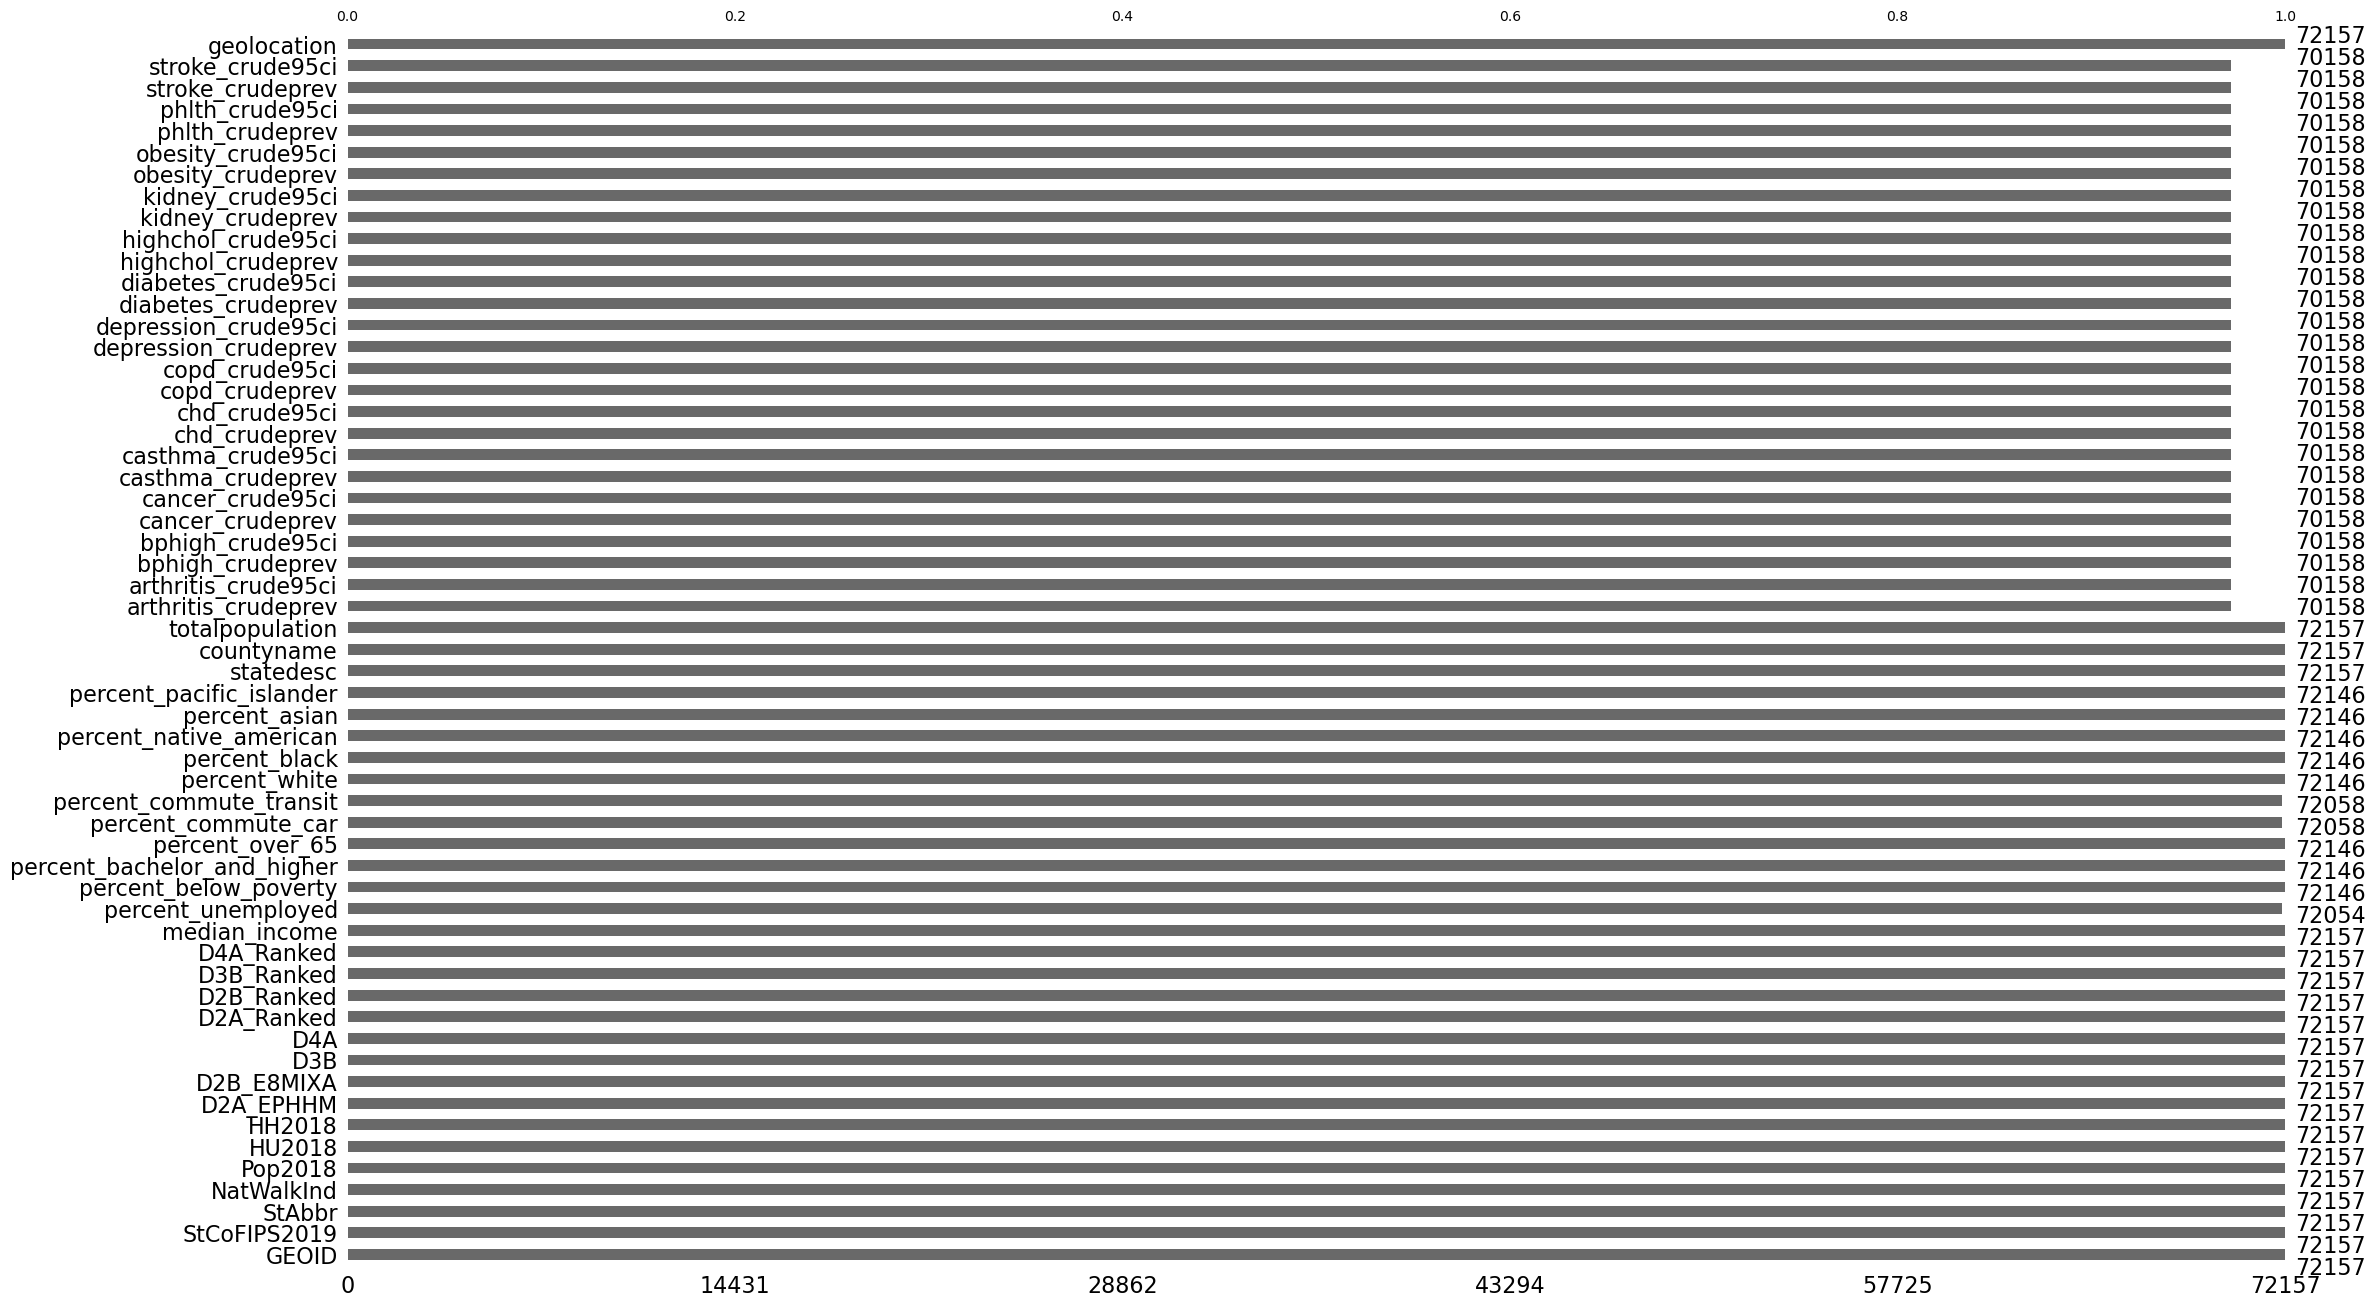

In [15]:
import missingno as msno
msno.bar(df)

It seems that a lot of health outcome data is missing.

In [16]:
df[df.arthritis_crudeprev.notna()].StAbbr.value_counts().sort_index()

StAbbr
AK     167
AL    1175
AR     684
AZ    1516
CA    8004
CO    1242
CT     828
DE     214
FL    4165
GA    1955
HI     315
IA     823
ID     297
IL    3114
IN    1505
KS     760
KY    1106
LA    1124
MA    1463
MD    1388
ME     351
MI    2745
MN    1334
MO    1387
MS     658
MT     269
NC    2169
ND     205
NE     532
NH     292
NM     498
NV     679
NY    4840
OH    2940
OK    1045
OR     825
PA    3196
RI     240
SC    1089
SD     222
TN    1480
TX    5222
UT     585
VA    1876
VT     183
WA    1444
WI    1392
WV     484
WY     131
Name: count, dtype: int64

For New-Jersey, all arthritis data is missing. Let's see if this is the case for other health outcomes.

In [17]:
health_outcomes_columns = [
    "arthritis_crudeprev",
    "arthritis_crude95ci",
    "bphigh_crudeprev",
    "bphigh_crude95ci",
    "cancer_crudeprev",
    "cancer_crude95ci",
    "casthma_crudeprev",
    "casthma_crude95ci",
    "chd_crudeprev",
    "chd_crude95ci",
    "copd_crudeprev",
    "copd_crude95ci",
    "depression_crudeprev",
    "depression_crude95ci",
    "diabetes_crudeprev",
    "diabetes_crude95ci",
    "highchol_crudeprev",
    "highchol_crude95ci",
    "kidney_crudeprev",
    "kidney_crude95ci",
    "obesity_crudeprev",
    "obesity_crude95ci",
    "phlth_crudeprev",
    "phlth_crude95ci",
    "stroke_crudeprev",
    "stroke_crude95ci"
]

df[df.StAbbr == "NJ"][health_outcomes_columns].notna().sum()

arthritis_crudeprev     0
arthritis_crude95ci     0
bphigh_crudeprev        0
bphigh_crude95ci        0
cancer_crudeprev        0
cancer_crude95ci        0
casthma_crudeprev       0
casthma_crude95ci       0
chd_crudeprev           0
chd_crude95ci           0
copd_crudeprev          0
copd_crude95ci          0
depression_crudeprev    0
depression_crude95ci    0
diabetes_crudeprev      0
diabetes_crude95ci      0
highchol_crudeprev      0
highchol_crude95ci      0
kidney_crudeprev        0
kidney_crude95ci        0
obesity_crudeprev       0
obesity_crude95ci       0
phlth_crudeprev         0
phlth_crude95ci         0
stroke_crudeprev        0
stroke_crude95ci        0
dtype: int64

All the health data is missing from New Jersey.

"The 2021 release uses 2019 BRFSS data for 22 measures and 2018 BRFSS data for 7 measures (all teeth lost, dental visits, mammograms, cervical cancer screening, colorectal cancer screening, core preventive services among older adults, and sleeping less than 7 hours a night)" (see [data.cdc](https://data.cdc.gov/500-Cities-Places/PLACES-Place-Data-GIS-Friendly-Format-2021-release/cj8b-94cj/about_data)).

"The NJBRFS dataset for 2018 is final but incomplete. [More info](https://www-doh.nj.gov/doh-shad/query/BRFSSQueryTechNotes.html#2018). There are no 2019 NJBRFS data due to data collection issues." (see [nj.gov](https://www-doh.nj.gov/doh-shad/query/selection/njbrfs/BRFSSSelection.html#:~:text=Overview,yet%20available%20for%202021%2D2023.)).

Since our health_outcomes_column only contains measure from the 2019 BRFSS data, this expplains our missing data.

Since our goal is to predict health outcomes, and since there are no measures for New Jersey, we have to exclude these rows for our analysis.

In [18]:
df = df.loc[df["StAbbr"].ne("NJ")]

Let's look at our missing data again.

<Axes: >

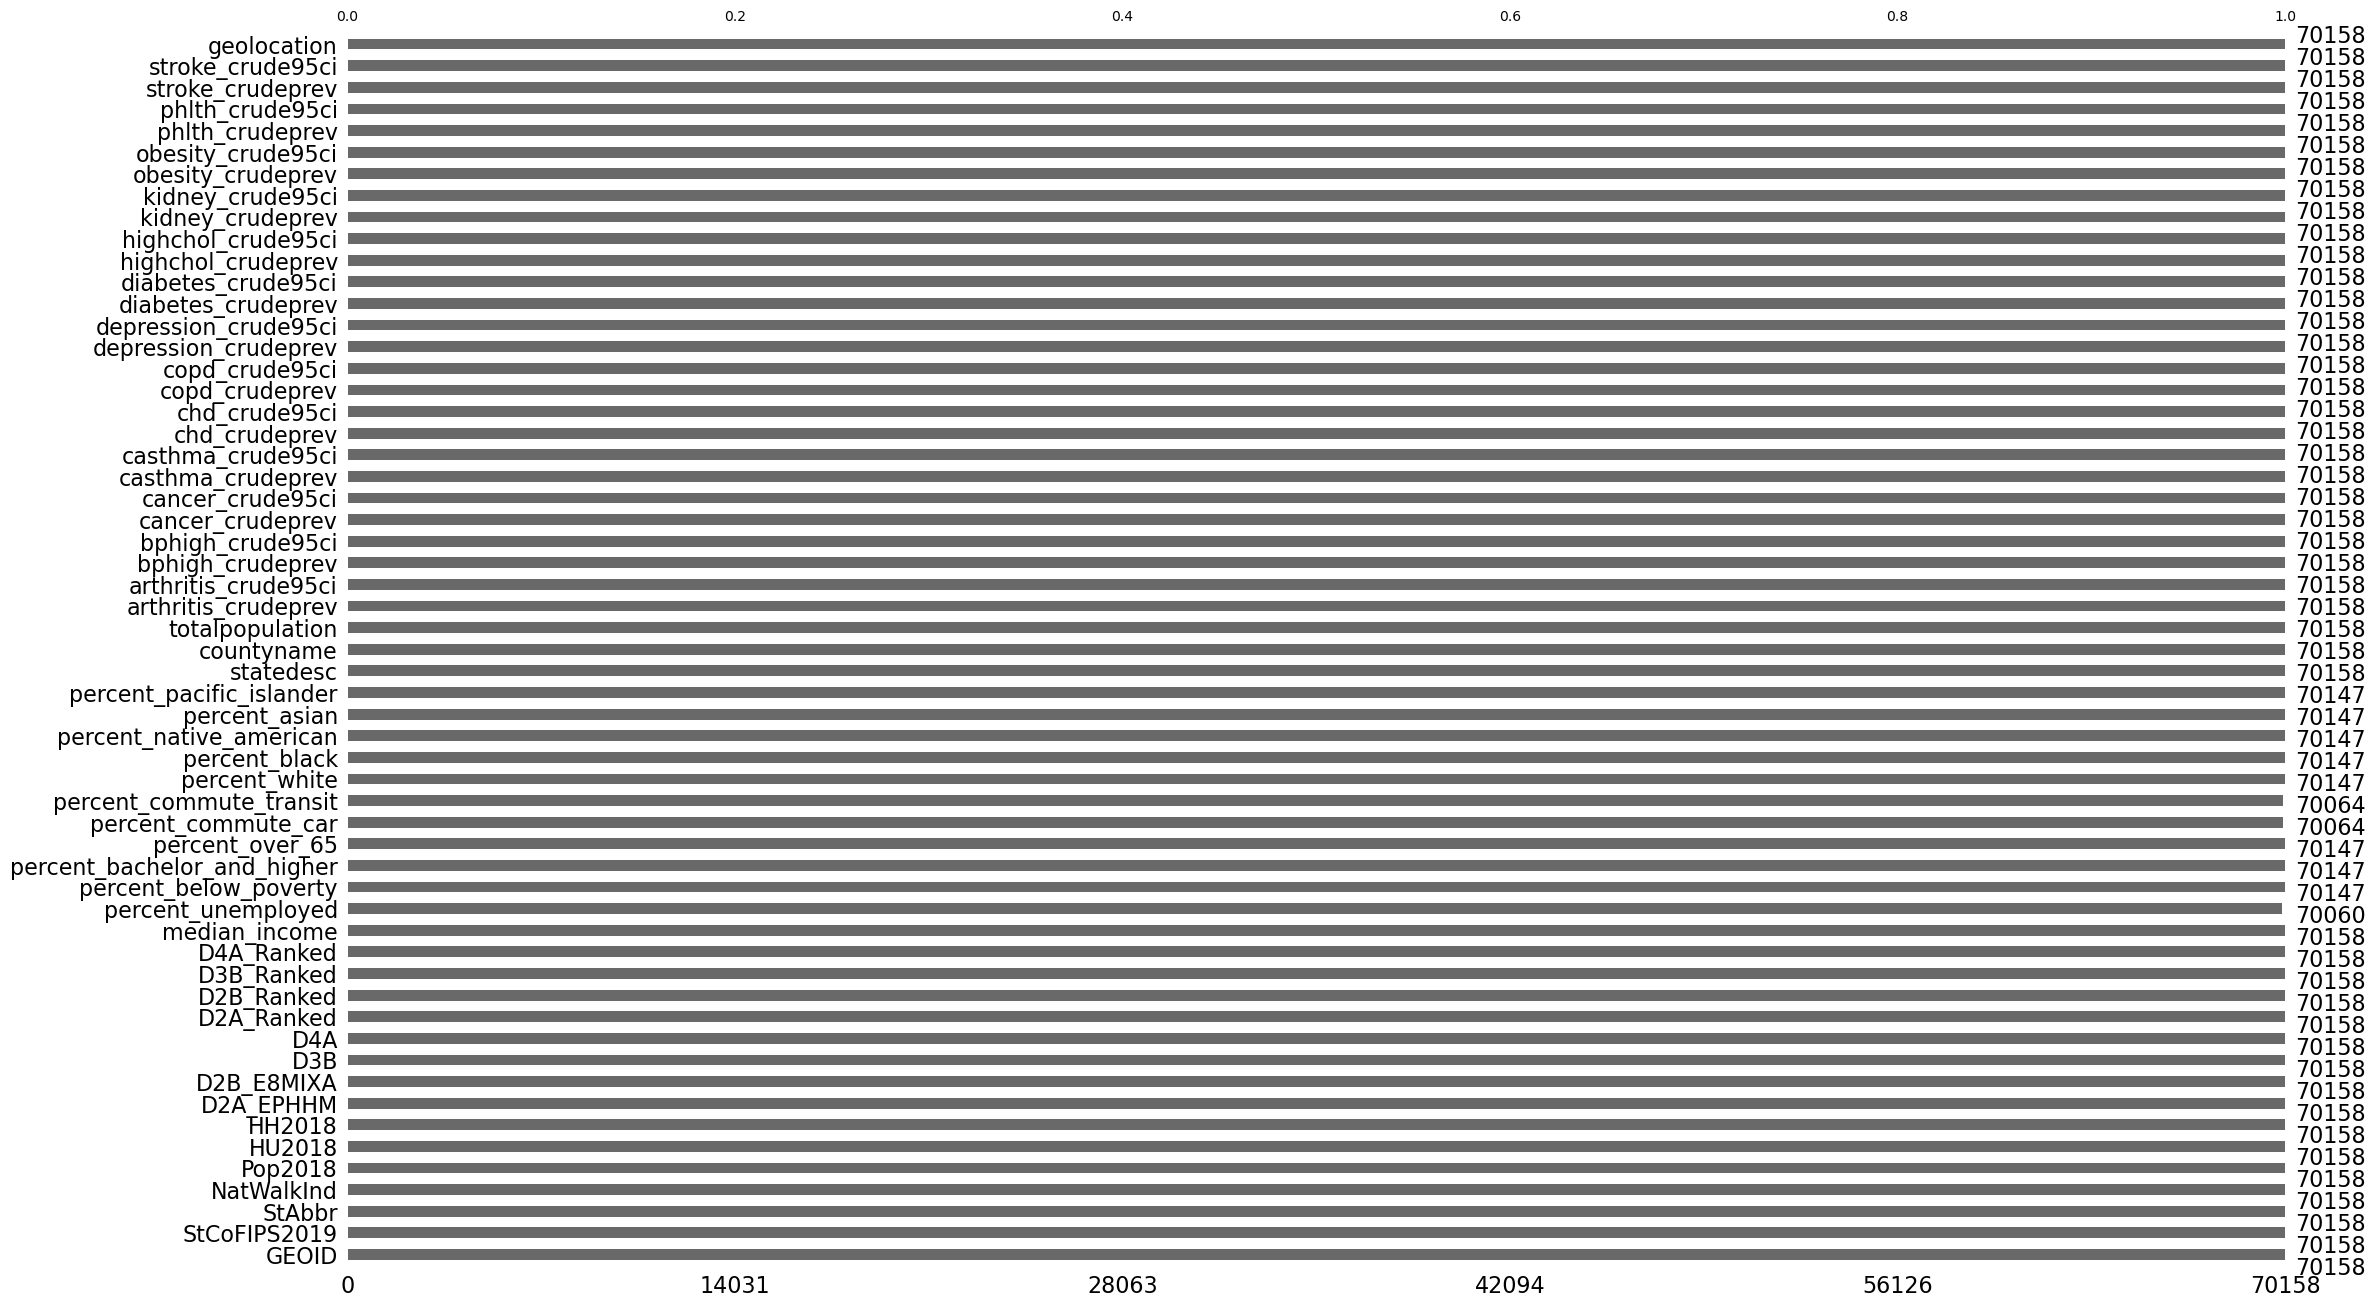

In [19]:
msno.bar(df)


It looks like some of the demographic data is missing.

In [20]:
demographic_data_column = [
    'percent_unemployed',
    'percent_below_poverty',
    'percent_bachelor_and_higher',
    'percent_over_65',
    'percent_commute_car',
    'percent_commute_transit',
    'percent_white',
    'percent_black',
    'percent_native_american',
    'percent_asian',
    'percent_pacific_islander'
]

rest = [c for c in df.columns if c not in set(demographic_data_column)]

In [21]:
# Number of missing values in the column of rest which has the most missing values.

df[rest].isna().sum().values.max()

np.int64(0)

All the missing data is in demographic_data_column!

In [22]:
# Extract the demographic columns
demographic = df[demographic_data_column]

# Extract the rows where at least one value is missing
missing_rows = demographic[demographic.isna().any(axis=1)]

# Print a sample 
missing_rows.sample(10)

,percent_unemployed,percent_below_poverty,percent_bachelor_and_higher,percent_over_65,percent_commute_car,percent_commute_transit,percent_white,percent_black,percent_native_american,percent_asian,percent_pacific_islander
38969,NaN,0.000000,0.000000,0.000000,NaN,NaN,59.663866,13.445378,6.722689,0.000000,0.000000
29442,NaN,0.000000,1.851852,2.203065,NaN,NaN,27.921456,67.672414,0.590677,0.223499,0.000000
9160,NaN,0.000000,3.877391,3.222426,NaN,NaN,35.813466,27.534713,3.143830,1.964894,1.440922
7023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4680,NaN,0.000000,1.516325,1.472053,NaN,NaN,33.226342,23.984505,3.331489,1.770891,0.221361
23778,NaN,57.894737,15.789474,78.947368,NaN,NaN,100.000000,0.000000,0.000000,0.000000,0.000000
4421,NaN,0.000000,2.276223,0.123039,NaN,NaN,58.843433,2.030145,1.537988,3.445094,0.861273
20230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55760,NaN,0.000000,1.391650,1.863817,NaN,NaN,46.421471,34.666998,0.621272,0.646123,0.000000
4682,NaN,0.000000,1.985195,0.706595,NaN,NaN,30.921938,14.266487,3.196501,0.942127,0.370121


<Axes: >

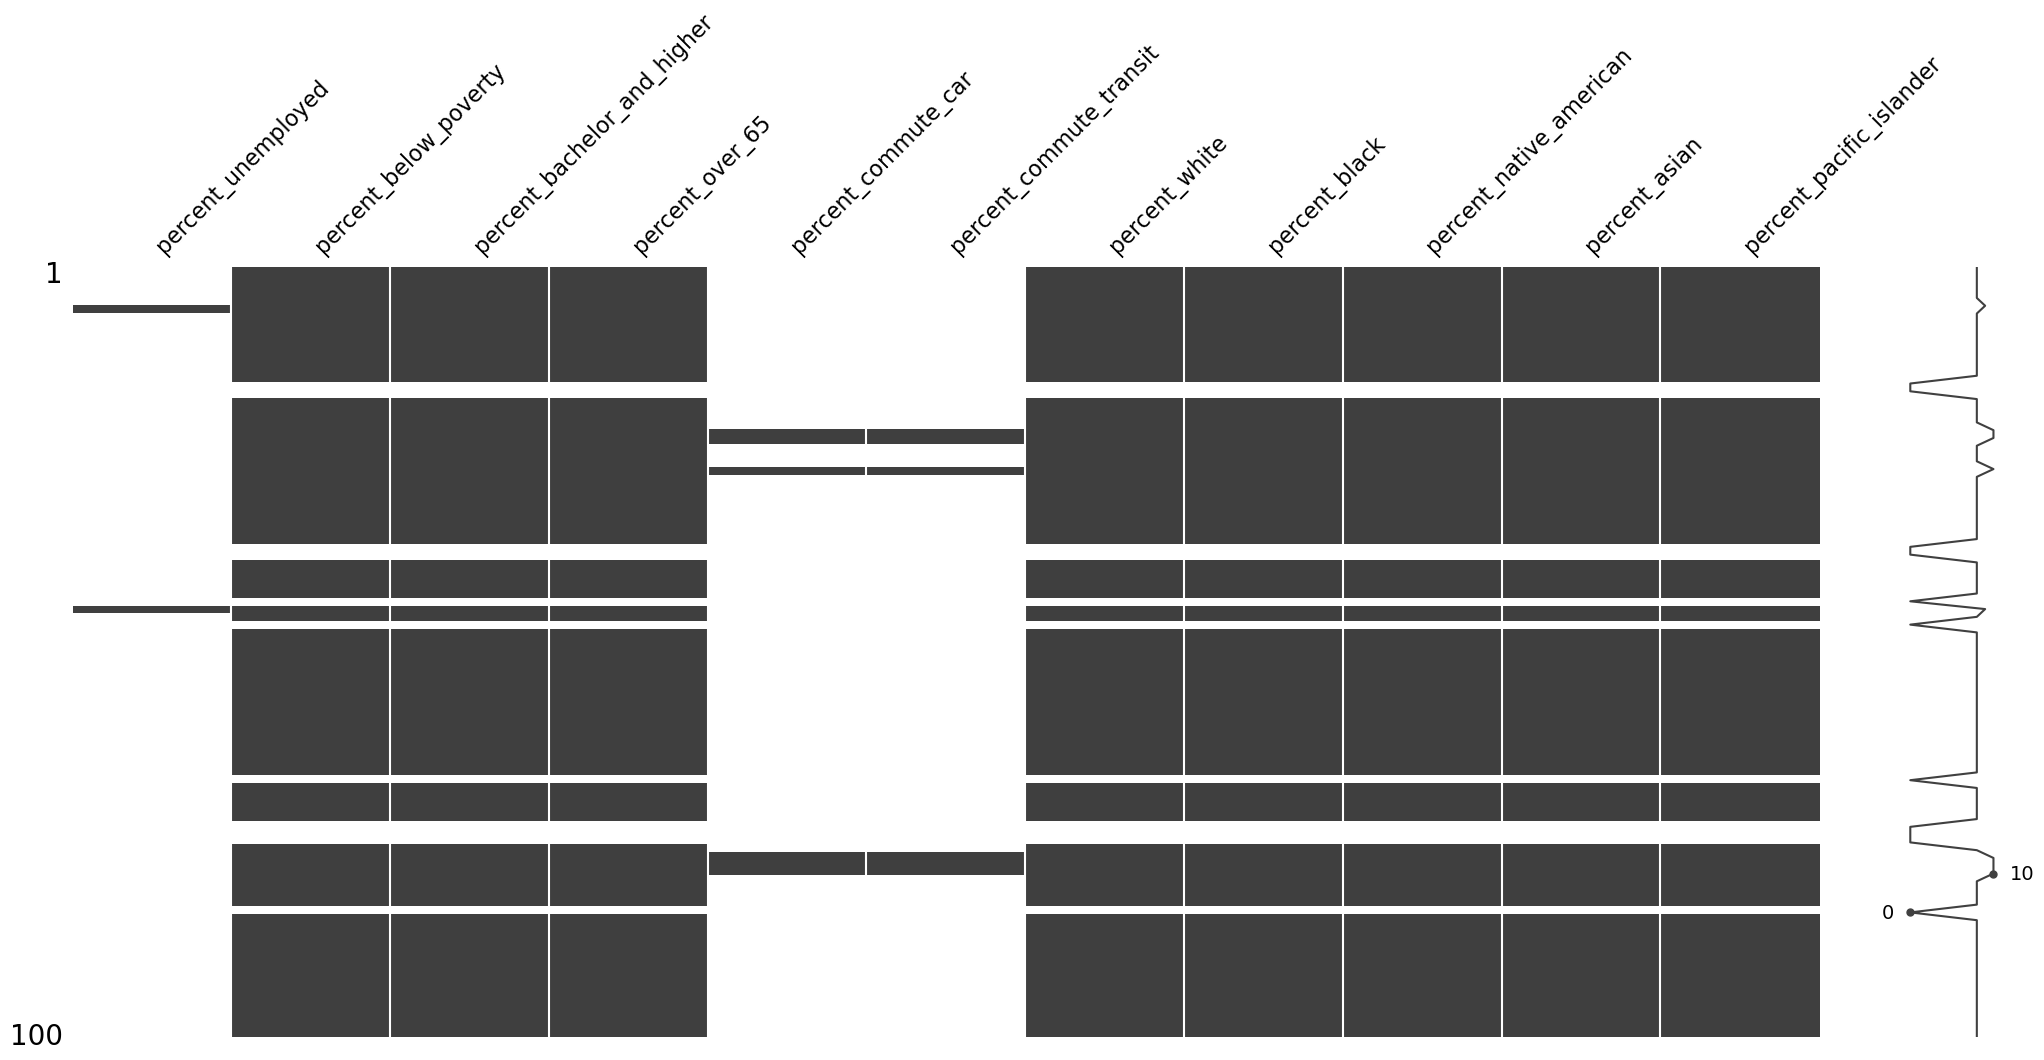

In [23]:
msno.matrix(missing_rows)

It seems that there is a pattern in the missing data. Let's make a heatmap.

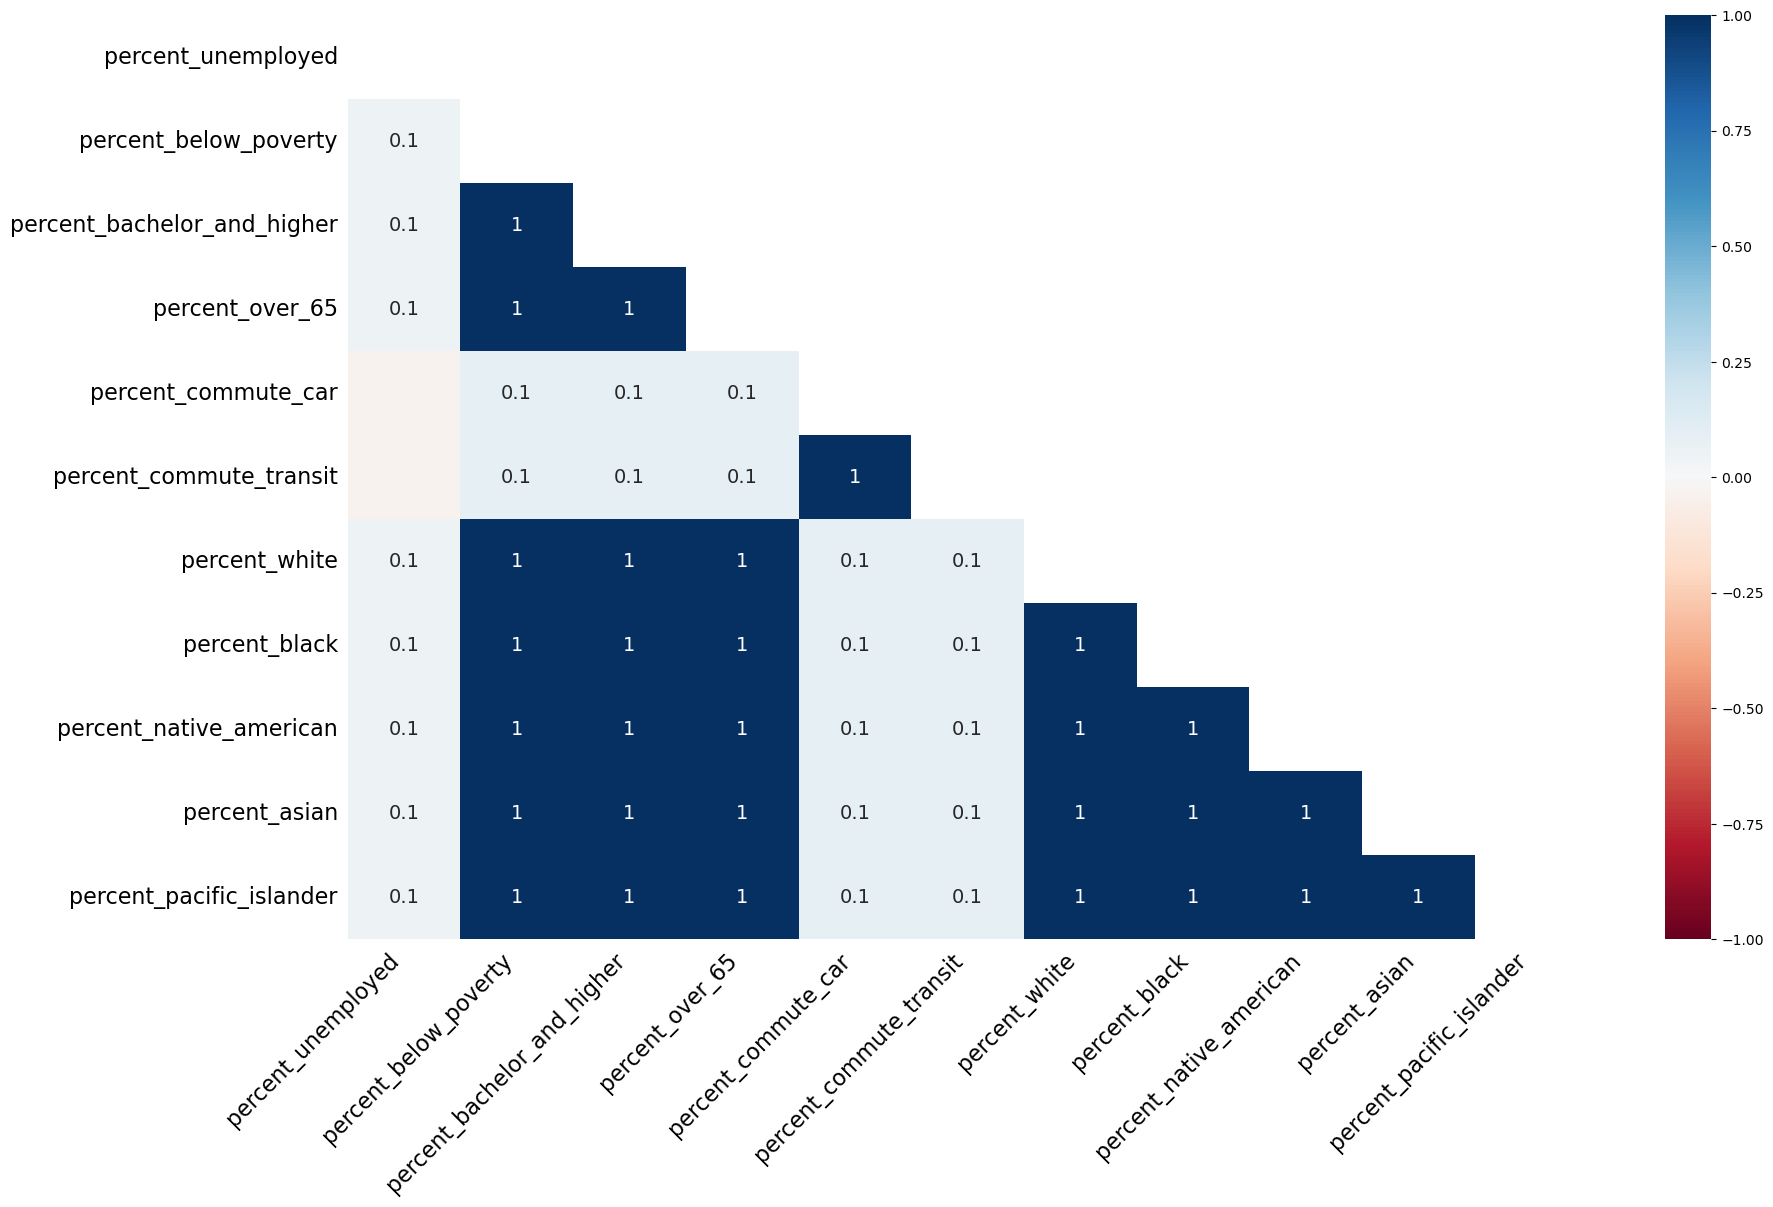

In [24]:
msno.heatmap(missing_rows)
plt.show()

- 0 means that variables appearing or not appearing have no effect on one another
- 1 means that if one variable appears the other definitely also does

What we can conclude from this heatmap is that, in a given census tract:

- if a `percent_commute_car` is missing then `percent_commute_transit` is also missing and vice versa,
- `percent_unemployed` missingness seems to not be correlated with any other variable,
- all the other variable are perfectly correlated, if any is missing, all the others are missing.

Since we wont regress on the demographics and since the missing values are scarce, we won't pursue our missingness analysis any further.

In [25]:
# We save our cleaned up data set
df.to_csv("clean_data.csv", index=False)